#### Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import cifar10

#### Load the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


#### dataset

In [4]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

#### Lets see the images

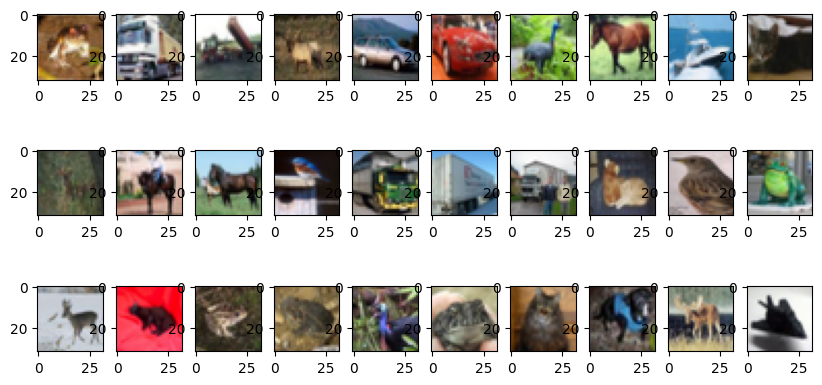

In [22]:
### x_train images
plt.figure(figsize = (10, 5))
x, y = 3, 10    ## 3 columns , 10 rows

for i in range(30):
  plt.subplot(x, y, i + 1)
  plt.imshow(x_train[i])
plt.show()

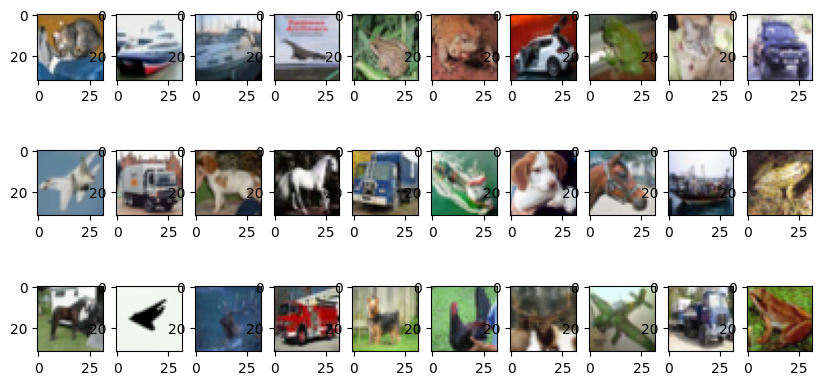

In [39]:
### x_test images
plt.figure(figsize = (10, 5))
x, y = 3, 10    ## 3 columns , 10 rows

for i in range(30):
  plt.subplot(x, y, i + 1)
  plt.imshow(x_test[i])
plt.show()

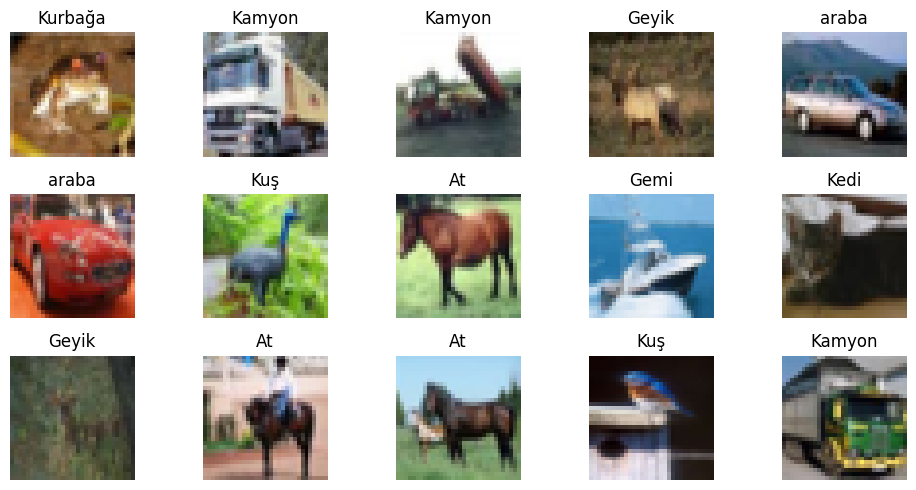

In [18]:
class_names = ['Uçak', 'araba', 'Kuş', 'Kedi', 'Geyik', 'Köpek', 'Kurbağa', 'At', 'Gemi', 'Kamyon']

plt.figure(figsize=(10, 5))
x, y = 3, 5
for i in range(15):
    plt.subplot(x, y, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Normalization

In [23]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#### Create CNN model

In [25]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [27]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs = 5, batch_size = 128)

Epoch 1/5
391/391 [==============================] - 73s 183ms/step - loss: 1.6971 - accuracy: 0.3793
Epoch 2/5
391/391 [==============================] - 73s 187ms/step - loss: 1.3365 - accuracy: 0.5183
Epoch 3/5
391/391 [==============================] - 76s 195ms/step - loss: 1.1973 - accuracy: 0.5767
Epoch 4/5
391/391 [==============================] - 71s 182ms/step - loss: 1.0956 - accuracy: 0.6146
Epoch 5/5
391/391 [==============================] - 70s 180ms/step - loss: 1.0249 - accuracy: 0.6408


In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 5s 14ms/step - loss: 1.0459 - accuracy: 0.6337
Test accuracy: 0.6337000131607056


#### prediction

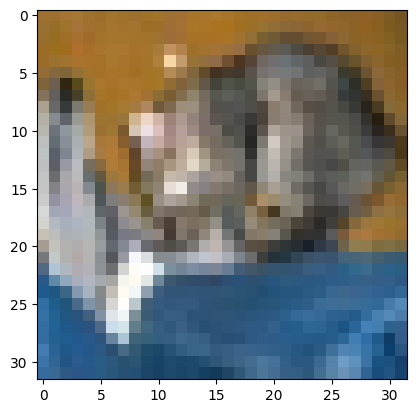

In [33]:
ornek = x_test[0]
plt.imshow(ornek.reshape(32, 32, 3))

In [37]:
ornek.shape
ornek = ornek.reshape(-1, 32, 32, 3)
ornek.shape

(1, 32, 32, 3)

In [38]:
tahmin = model.predict(ornek)
sinif = np.argmax(tahmin[0])
sinif_ismi = class_names[sinif]
print("Tahmin edilen sınıf:", sinif_ismi)

1/1 [==============================] - 0s 87ms/step
Tahmin edilen sınıf: Kedi
